Seasonal Naive MAE: 3.1047


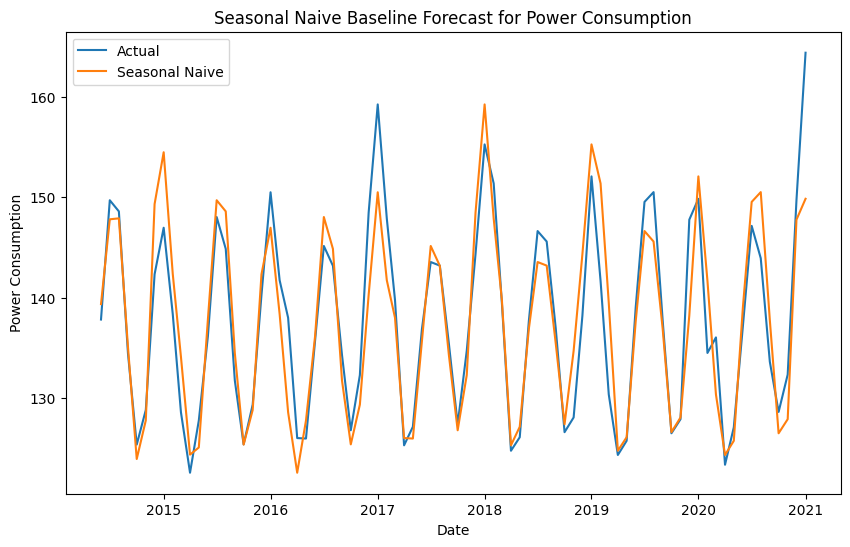

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Load the dataset
# File Path: ../ML471_S4_Datafile_Concept.csv
df = pd.read_csv('../ML471_S4_Datafile_Concept.csv')

# Preprocess: Convert Datetime to datetime objects and set as index
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

# Generate Seasonal Naïve Forecast
# Forecast for month t = Actual value at month (t-12)
df['Seasonal Naive'] = df['Consumption'].shift(12)

# Define the period for visualization and evaluation (approx. last 80 months)
test_df = df.loc['2014-06-01':'2021-01-01'].copy()

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_df['Consumption'], test_df['Seasonal Naive'])
print(f"Seasonal Naive MAE: {mae:.4f}")

# Visualization: Compare Actual vs Seasonal Naive Forecast
plt.figure(figsize=(10, 6))
plt.plot(test_df.index, test_df['Consumption'], label='Actual')
plt.plot(test_df.index, test_df['Seasonal Naive'], label='Seasonal Naive')

plt.title('Seasonal Naive Baseline Forecast for Power Consumption')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()